In [1]:
import os
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from mlxtend.classifier import StackingClassifier, EnsembleVoteClassifier

import matplotlib.pyplot as plt
%matplotlib inline

## Data Cleaning

#### Set filepath to tick data

In [2]:
filepath = r'C:\Users\daveh\Documents\Options\Trading'
filepath

'C:\\Users\\daveh\\Documents\\Options\\Trading'

#### Designate file containing tick data

In [3]:
file = 'train_tickData.csv'

#### Combine path & file name to access tick data

In [4]:
filename = os.path.join(filepath, file)

#### Load tick data into Pandas dataframe

In [5]:
df = pd.read_csv(filename, index_col=0)

df.head(10)

,bid,ask,logs
0,239.692485,239.692485,MWFNZ
1,239.691083,239.691083,8LKAM
2,239.693094,239.693094,46SWQ
3,239.694853,239.694853,UGJ46
4,239.696852,239.696852,YPZ7E
5,239.702650,239.702650,6EBLE
6,239.700129,239.700129,GGDC2
7,239.683031,239.683031,U7U3F
8,239.682870,239.682870,6SG18
9,239.683741,239.683741,AUQDX


In [6]:
df.dtypes

bid     float64
ask     float64
logs     object
dtype: object

In [7]:
# Check df for null values (NaNs)
df.isna().sum()

bid     18
ask     22
logs     0
dtype: int64

In [8]:
df.loc[df.bid.isnull(), 'bid'] = df.loc[df.bid.isnull(), 'ask']

In [9]:
df.isna().sum()

bid      0
ask     22
logs     0
dtype: int64

In [10]:
df.iloc[1138]

bid     239.817
ask     239.817
logs      E69I2
Name: 1138, dtype: object

In [11]:
df.loc[df.ask.isnull(), 'ask'] = df.loc[df.ask.isnull(), 'bid']

In [12]:
df.isna().sum()

bid     0
ask     0
logs    0
dtype: int64

In [13]:
df.iloc[13753]

bid     239.095
ask     239.095
logs      FLK2A
Name: 13753, dtype: object

In [14]:
df.iloc[13753:13760]

,bid,ask,logs
13753,239.094852,239.094852,FLK2A
13754,239.093339,239.093339,OLP7D
13755,239.093783,239.093783,6IFQU
13756,239.090484,239.090484,ZDK8Q
13757,239.091613,239.091613,3OBBZ
13758,239.089933,239.089933,MIEB2
13759,239.088489,239.088489,R7JVH


In [15]:
df[['bid', 'ask']] = df[['bid', 'ask']].round(4)

In [16]:
df.iloc[13753:13760]

,bid,ask,logs
13753,239.0949,239.0949,FLK2A
13754,239.0933,239.0933,OLP7D
13755,239.0938,239.0938,6IFQU
13756,239.0905,239.0905,ZDK8Q
13757,239.0916,239.0916,3OBBZ
13758,239.0899,239.0899,MIEB2
13759,239.0885,239.0885,R7JVH


In [17]:
df.head(20)

,bid,ask,logs
0,239.6925,239.6925,MWFNZ
1,239.6911,239.6911,8LKAM
2,239.6931,239.6931,46SWQ
3,239.6949,239.6949,UGJ46
4,239.6969,239.6969,YPZ7E
5,239.7027,239.7027,6EBLE
6,239.7001,239.7001,GGDC2
7,239.6830,239.6830,U7U3F
8,239.6829,239.6829,6SG18
9,239.6837,239.6837,AUQDX


In [18]:
df.loc[df['bid'].values == 0]

,bid,ask,logs
4886,0.0,238.8828,63SW2
31910,0.0,239.3720,08WGC
56375,0.0,238.8009,ULUP1
59773,0.0,240.2879,7ZI8N
71570,0.0,240.6847,2VF9J
94923,0.0,240.6113,JYLIC
112789,0.0,240.7772,UGKJI
119473,0.0,240.7767,5U464
128829,0.0,240.1755,M0DU2
130668,0.0,240.8778,UROEN


In [19]:
df.loc[df['bid'].values == 0, 'bid'] = df.loc[df['bid'].values == 0, 'ask']

In [20]:
df.iloc[31910]

bid     239.372
ask     239.372
logs      08WGC
Name: 31910, dtype: object

#### Calculate log returns on 'bid' column ${ln(\frac{r_{t}}{r_{t-1}})}$

In [21]:
df['logRet'] = np.log(df['bid'] / df['bid'].shift(1))
df.dropna(inplace=True)

In [22]:
df.head(10)

,bid,ask,logs,logRet
1,239.6911,239.6911,8LKAM,-5.840834e-06
2,239.6931,239.6931,46SWQ,8.344038e-06
3,239.6949,239.6949,UGJ46,7.509575e-06
4,239.6969,239.6969,YPZ7E,8.343906e-06
5,239.7027,239.7027,6EBLE,2.419693e-05
6,239.7001,239.7001,GGDC2,-1.084683e-05
7,239.6830,239.6830,U7U3F,-7.134169e-05
8,239.6829,239.6829,6SG18,-4.172178e-07
9,239.6837,239.6837,AUQDX,3.337738e-06
10,239.6855,239.6855,7EZWF,7.509869e-06


### Add binary classifier label

#### *1* = uptick (or unchanged), *0* = downtick

In [23]:
classifier = pd.Series(np.where(df.logRet.values >= 0, 1, 0), df.index)

df = df.assign(label = classifier)

In [24]:
df.head(10)

,bid,ask,logs,logRet,label
1,239.6911,239.6911,8LKAM,-5.840834e-06,0
2,239.6931,239.6931,46SWQ,8.344038e-06,1
3,239.6949,239.6949,UGJ46,7.509575e-06,1
4,239.6969,239.6969,YPZ7E,8.343906e-06,1
5,239.7027,239.7027,6EBLE,2.419693e-05,1
6,239.7001,239.7001,GGDC2,-1.084683e-05,0
7,239.6830,239.6830,U7U3F,-7.134169e-05,0
8,239.6829,239.6829,6SG18,-4.172178e-07,0
9,239.6837,239.6837,AUQDX,3.337738e-06,1
10,239.6855,239.6855,7EZWF,7.509869e-06,1


#### Pickle cleaned dataframe (*if desired*)

In [25]:
picklePath = r'C:\Users\daveh\Documents\Options\Trading'

df.to_pickle(os.path.join(picklePath, 'tickData.pkl'))

#  

## Model Training & Testing

#### Import cleaned dataframe from pickle file (*if desired*)

In [26]:
# SET PATH TO PICKLED FILE:
picklePath = r'C:\Users\daveh\Documents\Options\Trading'

df = pd.read_pickle(os.path.join(picklePath, 'tickData.pkl'))

### Group 1: Classification with Binary (Classifier) Label as x & y-variables

#### Divide dataset into 70/30 (%) Train/Test Split

In [27]:
nTrain = int(.70*df.shape[0])
train, test = df[0:nTrain], df[nTrain:df.shape[0]]

train.is_copy = False
test.is_copy = False

print(train.shape)
print(test.shape)

(209999, 5)
(90000, 5)


#### Define x, y variables for Train & Test sets, set *nlags* for # of lagged returns to use with x-variable

In [28]:
nlags = 5

# CALCULATE TRAINING SET
y_train = train.loc[:,'label'].values[nlags:]
x_train = train.loc[:,'label'].shift(1).values[nlags:]
for i in range(2,nlags+1):
    lagged_train = train.loc[:,'label'].shift(i).values[nlags:]
    x_train = np.column_stack((x_train, lagged_train))
    #x_train = np.concatenate((x_train, lagged_train.T), axis=1)

print('x_train: ',x_train.shape)

# CALCULATE TEST SET
y_test = test.loc[:,'label'].values[nlags:]
x_test = test.loc[:,'label'].shift(1).values[nlags:]
for i in range(2,nlags+1):
    lagged_test = test.loc[:,'label'].shift(i).values[nlags:]
    x_test = np.column_stack((x_test, lagged_test))
    #x_test = np.concatenate((x_test, lagged_test.T), axis=1)

print('x_test: ',x_test.shape)

x_train:  (209994, 5)
x_test:  (89995, 5)


#### Calibrate Multiple Models: K-Nearest Neighbors (KNN), Support Vector Machine (SVM), Random Forest, Gradient Boost

In [29]:
clf1 = KNeighborsClassifier(n_neighbors=7)
clf2 = LinearSVC(dual=False)
clf3 = RandomForestClassifier(n_estimators=200, max_depth=5, n_jobs=1, criterion='gini', random_state=1)
clf4 = RandomForestClassifier(n_estimators=200, max_depth=5, n_jobs=1, criterion='entropy', random_state=1)
clf5 = GradientBoostingClassifier(learning_rate=0.05, subsample=0.5, max_depth=3, n_estimators=200)

for clf, label in zip([clf1, clf2, clf3, clf4, clf5],
                      ['KNN',
                       'Support Vector Machine',
                       'RandomForest_gini',
                       'RandomForest_entropy',
                       'GradientBoostingClassifier']):

    print("Accuracy: %0.4f [%s]" % (clf.fit(x_train, y_train).score(x_test, y_test), label))

Accuracy: 0.6765 [KNN]
Accuracy: 0.7285 [Support Vector Machine]
Accuracy: 0.7305 [RandomForest_gini]
Accuracy: 0.7305 [RandomForest_entropy]
Accuracy: 0.7305 [GradientBoostingClassifier]


#### Model Stacking ('Wisdom of the Crowd")

In [30]:
sclf = StackingClassifier(classifiers=[clf3, clf4, clf5],
                          use_probas=False,
                          average_probas=False,
                          meta_classifier=clf5)
sclf.fit(x_train, y_train).score(x_test, y_test)

0.7305183621312296

#### Ensemble Classification

In [31]:
eclf = EnsembleVoteClassifier(clfs=[clf3, clf4, clf5], weights=[1, 1, 2], voting='soft')
eclf.fit(x_train, y_train).score(x_test, y_test)

0.7305183621312296

### Group 2: Classification with Log Returns as x-variable 

#### Divide dataset into 70/30 (%) Train/Test Split & Standardize Log Returns (*necessary for SVM*)

In [32]:
nTrain = int(.70*df.shape[0])
train, test = df[0:nTrain], df[nTrain:df.shape[0]]

sclTrain = train.copy()
sclTest = test.copy()

# SET FEATURE COLUMNS TO BE SCALED
cols = ['logRet']

trainFeatures = sclTrain[cols]
testFeatures = sclTest[cols]

scl = StandardScaler()
trainFeatures = scl.fit_transform(trainFeatures.values)
testFeatures = scl.transform(testFeatures.values)

sclCols = [c+'(scaled)' for c in cols]
print(sclCols)

sclTrain[sclCols] = pd.DataFrame(trainFeatures, index = sclTrain.index)
sclTest[sclCols] = pd.DataFrame(testFeatures, index = sclTest.index)

sclTrain = sclTrain[ [ col for col in sclTrain.columns if col != 'label' ] + ['label'] ]
sclTest = sclTest[ [ col for col in sclTest.columns if col != 'label' ] + ['label'] ]

sclTrain.head(10)

['logRet(scaled)']


,bid,ask,logs,logRet,logRet(scaled),label
1,239.6911,239.6911,8LKAM,-5.840834e-06,-0.194808,0
2,239.6931,239.6931,46SWQ,8.344038e-06,0.269408,1
3,239.6949,239.6949,UGJ46,7.509575e-06,0.242099,1
4,239.6969,239.6969,YPZ7E,8.343906e-06,0.269403,1
5,239.7027,239.7027,6EBLE,2.419693e-05,0.788211,1
6,239.7001,239.7001,GGDC2,-1.084683e-05,-0.358635,0
7,239.6830,239.6830,U7U3F,-7.134169e-05,-2.338397,0
8,239.6829,239.6829,6SG18,-4.172178e-07,-0.017314,0
9,239.6837,239.6837,AUQDX,3.337738e-06,0.105571,1
10,239.6855,239.6855,7EZWF,7.509869e-06,0.242109,1


#### Define x, y variables for Train & Test sets, set *nlags* for # of lagged returns to use with x-variable

In [33]:
nlags = 10

# SET COLUMNS TO USE AS X-VARIABLE(s)
featureCols = ['logRet(scaled)']

# CALCULATE TRAINING SET
y_train = sclTrain.loc[:,'label'].values[nlags:]
x_train = sclTrain.loc[:,featureCols].shift(1).values[nlags:]
for i in range(2,nlags+1):
    lagged_train = sclTrain.loc[:,featureCols].shift(i).values[nlags:]
    x_train = np.column_stack((x_train, lagged_train))
    #x_train = np.concatenate((x_train, lagged_train.T), axis=1)

print('x_train: ',x_train.shape)

# CALCULATE TEST SET
y_test = sclTest.loc[:,'label'].values[nlags:]
x_test = sclTest.loc[:,featureCols].shift(1).values[nlags:]
for i in range(2,nlags+1):
    lagged_test = sclTest.loc[:,featureCols].shift(i).values[nlags:]
    x_test = np.column_stack((x_test, lagged_test))
    #x_test = np.concatenate((x_test, lagged_test.T), axis=1)

print('x_test: ',x_test.shape)

df2 = pd.DataFrame(x_train)
df2.head()

x_train:  (209989, 10)
x_test:  (89990, 10)


,0,1,2,3,4,5,6,7,8,9
0,0.242109,0.105571,-0.017314,-2.338397,-0.358635,0.788211,0.269403,0.242099,0.269408,-0.194808
1,0.542486,0.242109,0.105571,-0.017314,-2.338397,-0.358635,0.788211,0.269403,0.242099,0.269408
2,0.255756,0.542486,0.242109,0.105571,-0.017314,-2.338397,-0.358635,0.788211,0.269403,0.242099
3,-0.099234,0.255756,0.542486,0.242109,0.105571,-0.017314,-2.338397,-0.358635,0.788211,0.269403
4,0.515168,-0.099234,0.255756,0.542486,0.242109,0.105571,-0.017314,-2.338397,-0.358635,0.788211


#### Calibrate Multiple Models: KNN, SVM, RF & GB

In [34]:
clf1 = KNeighborsClassifier(n_neighbors=7)
clf2 = LinearSVC(dual=False)
clf3 = RandomForestClassifier(n_estimators=200, max_depth=5, n_jobs=1, criterion='gini', random_state=1)
clf4 = RandomForestClassifier(n_estimators=200, max_depth=5, n_jobs=1, criterion='entropy', random_state=1)
clf5 = GradientBoostingClassifier(learning_rate=0.05, subsample=0.5, max_depth=3, n_estimators=200)

for clf, label in zip([clf1, clf2, clf3, clf4, clf5],
                      ['KNN',
                       'Support Vector Machine',
                       'RandomForest_gini',
                       'RandomForest_entropy',
                       'GradientBoostingClassifier']):

    print("Accuracy: %0.4f [%s]" % (clf.fit(x_train, y_train).score(x_test, y_test), label))

Accuracy: 0.7183 [KNN]
Accuracy: 0.7121 [Support Vector Machine]
Accuracy: 0.7498 [RandomForest_gini]
Accuracy: 0.7496 [RandomForest_entropy]
Accuracy: 0.7508 [GradientBoostingClassifier]


#### Model Stacking ('Wisdom of the Crowd")

In [35]:
sclf = StackingClassifier(classifiers=[clf3, clf4, clf5],
                          use_probas=False,
                          average_probas=False,
                          meta_classifier=clf5)
sclf.fit(x_train, y_train).score(x_test, y_test)

0.7502278030892321

#### Ensemble Classification

In [36]:
eclf = EnsembleVoteClassifier(clfs=[clf3, clf4, clf5], weights=[1, 1, 2], voting='soft')
eclf.fit(x_train, y_train).score(x_test, y_test)

0.7513834870541172

### Create Dataframe for projected strategy returns

In [37]:
df3 = pd.DataFrame(sclTest.loc[:,'logRet'].values[nlags:], columns=['logRet'])
print (df3.shape)
df3.head()

(89990, 1)


,logRet
0,-1.548691e-05
1,-6.520876e-06
2,-1.630226e-06
3,-4.075568e-07
4,-9.781414e-06


#### Set y-predict vector for Top Performing Model (Gradient Boost)

In [38]:
gbc = GradientBoostingClassifier(learning_rate=0.05, subsample=0.5, max_depth=3, n_estimators=200)
print(gbc.fit(x_train,y_train).score(x_test, y_test))

0.7506278475386154


In [39]:
gbcTrade = gbc.predict(x_test)
gbcTrade.shape

(89990,)

#### Add y-predict vector to new dataframe

In [40]:
df3['gbcTrade'] = gbcTrade
df3.head()

,logRet,gbcTrade
0,-1.548691e-05,0
1,-6.520876e-06,0
2,-1.630226e-06,0
3,-4.075568e-07,0
4,-9.781414e-06,0


#### Calculate per-Trade (Log) returns

In [41]:
df3['gbcRet'] = np.where(df3.gbcTrade == 0, (df3.logRet * -1), df3.logRet)
df3.head()

,logRet,gbcTrade,gbcRet
0,-1.548691e-05,0,1.548691e-05
1,-6.520876e-06,0,6.520876e-06
2,-1.630226e-06,0,1.630226e-06
3,-4.075568e-07,0,4.075568e-07
4,-9.781414e-06,0,9.781414e-06


#### Calculate Cumulative Trade (Log) returns

In [42]:
df3['gbcTot'] = df3['gbcRet'].cumsum()
df3.head()

,logRet,gbcTrade,gbcRet,gbcTot
0,-1.548691e-05,0,1.548691e-05,0.000015
1,-6.520876e-06,0,6.520876e-06,0.000022
2,-1.630226e-06,0,1.630226e-06,0.000024
3,-4.075568e-07,0,4.075568e-07,0.000024
4,-9.781414e-06,0,9.781414e-06,0.000034


### Group 3: Multiple Feature Classification - Log Returns & Binary Label as x-variable

#### Define x, y variables for Train & Test sets, set *nlags* for # of lagged returns to use with x-variable

In [43]:
nlags = 10

# SET COLUMNS TO USE AS X-VARIABLE(s)
featureCols = ['logRet(scaled)','label']

# CALCULATE TRAINING SET
y_train = sclTrain.loc[:,'label'].values[nlags:]
x_train = sclTrain.loc[:,featureCols].shift(1).values[nlags:]
for i in range(2,nlags+1):
    lagged_train = sclTrain.loc[:,featureCols].shift(i).values[nlags:]
    x_train = np.column_stack((x_train, lagged_train))
    #x_train = np.concatenate((x_train, lagged_train.T), axis=1)

print('x_train: ',x_train.shape)

# CALCULATE TEST SET
y_test = sclTest.loc[:,'label'].values[nlags:]
x_test = sclTest.loc[:,featureCols].shift(1).values[nlags:]
for i in range(2,nlags+1):
    lagged_test = sclTest.loc[:,featureCols].shift(i).values[nlags:]
    x_test = np.column_stack((x_test, lagged_test))
    #x_test = np.concatenate((x_test, lagged_test.T), axis=1)

print('x_test: ',x_test.shape)

df2 = pd.DataFrame(x_train)
df2.head()

x_train:  (209989, 20)
x_test:  (89990, 20)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.242109,1.0,0.105571,1.0,-0.017314,0.0,-2.338397,0.0,-0.358635,0.0,0.788211,1.0,0.269403,1.0,0.242099,1.0,0.269408,1.0,-0.194808,0.0
1,0.542486,1.0,0.242109,1.0,0.105571,1.0,-0.017314,0.0,-2.338397,0.0,-0.358635,0.0,0.788211,1.0,0.269403,1.0,0.242099,1.0,0.269408,1.0
2,0.255756,1.0,0.542486,1.0,0.242109,1.0,0.105571,1.0,-0.017314,0.0,-2.338397,0.0,-0.358635,0.0,0.788211,1.0,0.269403,1.0,0.242099,1.0
3,-0.099234,0.0,0.255756,1.0,0.542486,1.0,0.242109,1.0,0.105571,1.0,-0.017314,0.0,-2.338397,0.0,-0.358635,0.0,0.788211,1.0,0.269403,1.0
4,0.515168,1.0,-0.099234,0.0,0.255756,1.0,0.542486,1.0,0.242109,1.0,0.105571,1.0,-0.017314,0.0,-2.338397,0.0,-0.358635,0.0,0.788211,1.0


In [45]:
clf1 = KNeighborsClassifier(n_neighbors=7)
clf2 = LinearSVC(dual=False)
clf3 = RandomForestClassifier(n_estimators=200, max_depth=5, n_jobs=1, criterion='gini', random_state=1)
clf4 = RandomForestClassifier(n_estimators=200, max_depth=5, n_jobs=1, criterion='entropy', random_state=1)
clf5 = GradientBoostingClassifier(learning_rate=0.05, subsample=0.5, max_depth=3, n_estimators=200)

for clf, label in zip([clf1, clf2, clf3, clf4, clf5],
                      ['KNN',
                       'Support Vector Machine',
                       'RandomForest_gini',
                       'RandomForest_entropy',
                       'GradientBoostingClassifier']):

    print("Accuracy: %0.4f [%s]" % (clf.fit(x_train, y_train).score(x_test, y_test), label))

Accuracy: 0.7137 [KNN]
Accuracy: 0.7292 [Support Vector Machine]
Accuracy: 0.7434 [RandomForest_gini]
Accuracy: 0.7431 [RandomForest_entropy]
Accuracy: 0.7507 [GradientBoostingClassifier]


#### Stacking ('Wisdom of the Crowd")

In [46]:
sclf = StackingClassifier(classifiers=[clf3, clf4, clf5],
                          use_probas=False,
                          average_probas=False,
                          meta_classifier=clf5)
sclf.fit(x_train, y_train).score(x_test, y_test)

0.7510390043338149

#### Ensemble Classification

In [47]:
eclf = EnsembleVoteClassifier(clfs=[clf3, clf4, clf5], weights=[1, 1, 2], voting='soft')
eclf.fit(x_train, y_train).score(x_test, y_test)

0.7500833425936215

#  

## Plot Individual & Cumulative Returns for Top Predictive Model:

### Classification with Log Returns as x-variable (*nlags=10*) - Gradient Boost 

#### Cumulative & Individual Log Returns

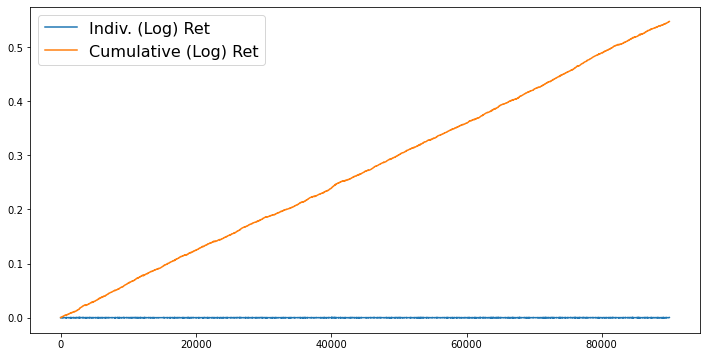

In [48]:
df3[['gbcRet','gbcTot']].plot(figsize=(12,6))
plt.legend(prop={'size': 16},labels=('Indiv. (Log) Ret','Cumulative (Log) Ret'))

#### Individual Log Returns (Only)

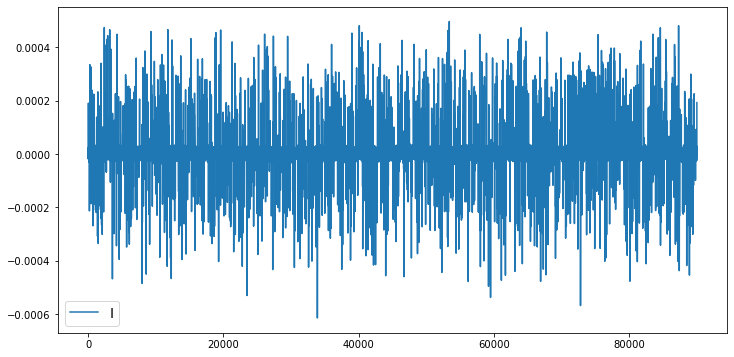

In [49]:
df3['gbcRet'].plot(figsize=(12,6))
plt.legend(prop={'size': 14},labels=('Indiv. Ret'))

#### Breakdown of Individual Log Returns

In [50]:
df3[['gbcRet']].describe()

,gbcRet
count,89990.000000
mean,0.000006
std,0.000031
min,-0.000614
25%,-0.000000
50%,0.000007
75%,0.000013
max,0.000497


#### Calculate Strategy Sharpe based on n-projected trades/day

In [51]:
n=5000
sharpe = np.sqrt(n)*(np.mean(df3.gbcRet)/np.std(df3.gbcRet))

print('Sharpe (%s trades/day) = %0.2f' % (n, sharpe))

Sharpe (5000 trades/day) = 14.09
